## 以状态值函数大者为行动依据

In [25]:
# 载入相关套件
import numpy as np
import random

In [26]:
# 参数设定
NODE_COUNT = 5      # 节点数
NORMAL_REWARD = -0.2 # 每走一步扣分 0.2

In [27]:
# 环境类别
class Environment():
    # 初始化
    def __init__(self):
        # 储存状态值函数，索引值[0]:不用，从1开始
        self.state_value = np.full((NODE_COUNT+1), 0.0)
        self.state_value[1]=-1
        self.state_value[NODE_COUNT]=1

        # 更新次数，索引值[0]:不用，从1开始
        self.state_value_count = np.full((NODE_COUNT+1), 0)
        self.state_value_count[1]=1
        self.state_value_count[NODE_COUNT]=1
        
    # 初始化
    def reset(self):
        self.poistion = int((1+NODE_COUNT) / 2)  # 玩家一开始站中间位置
        self.trajectory=[] # 行动轨迹

    def get_states(self):
        # 状态空间(State Space)，共有5个位置
        return [i for i in range(1, 6)]

    def get_actions(self):        
        return [-1, 1] # 行动空间(Action Space)

    def is_done(self): # 判断比赛回合是否结束
        # 是否走到左右端点
        if self.poistion == 1 or self.poistion == NODE_COUNT:
            self.trajectory.append(self.poistion)   
            return True
        else:
            return False
    
    # 步骤
    def step(self, action):
        # 是否回合已结束
        if self.is_done():
            # 不应该有机会执行到这里
            raise Exception("Game is over")
            
        self.trajectory.append(self.poistion)        
        self.poistion += action
        if self.poistion == 1:
            reward = -1
        elif self.poistion == NODE_COUNT:
            reward = 1
        else:    
            reward = NORMAL_REWARD

        return self.poistion, reward

    def update_state_value(self, final_value):
        # 倒推，更新状态值函数
        for i in range(len(self.trajectory)-1, -1, -1):
            final_value += NORMAL_REWARD
            self.state_value[self.trajectory[i]] += final_value
            self.state_value_count[self.trajectory[i]] += 1
                
    # 取得状态值函数期望值
    def get_observation(self):
        mean1 = np.full((NODE_COUNT+1), 0)
        for i in range(self.state_value.shape[0]):
            if self.state_value_count[i] <= 0.0:
                mean1[i] = 0
            else:
                mean1[i] = self.state_value[i] / self.state_value_count[i]
        return mean1

In [28]:
# 代理人类别
class Agent():
    # 初始化
    def __init__(self):
        pass
        
    def action(self, env):
        # 取得状态值函数期望值
        state_value = env.get_observation()
        
        # 以左/右节点状态值函数大者为行动依据，如果两个状态值一样大，随机选择一个
        if state_value[env.poistion-1] > state_value[env.poistion+1]:  
            return -1            
        if state_value[env.poistion-1] < state_value[env.poistion+1]:  
            return 1            
        else:  
            return random.choice([-1, 1])            

In [29]:
# 建立实验，含环境、代理人物件
env = Environment()
agent = Agent()

# 进行实验
total_reward_list = []
for i in range(10):
    env.reset()  # 重置
    total_reward=0  # 累计报酬
    action_count = 0 
    while not env.is_done():
        # 采取行动
        action = agent.action(env)
        
        # 更新下一步
        state, reward = env.step(action)
        #print(state, reward)
        # 计算累计报酬
        total_reward += reward
        
        action_count += 1
        if action_count>=100: # 避免绕圈圈
            break
    print('trajectory', env.trajectory)
    env.update_state_value(total_reward)
    total_reward_list.append(round(total_reward, 2))
    
# 显示累计报酬
print(f"累计报酬: {total_reward_list}")

trajectory [6, 5, 6, 5, 4, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 5, 6, 5, 4, 3, 4, 5, 6, 7, 8, 7, 6, 7, 8, 9, 8, 7, 8, 7, 6, 7, 8, 7, 6, 7, 6, 5, 6, 7, 8, 7, 6, 5, 6, 7, 8, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
trajectory [6, 7, 8, 9, 10, 11]
累计报酬: [-11.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]


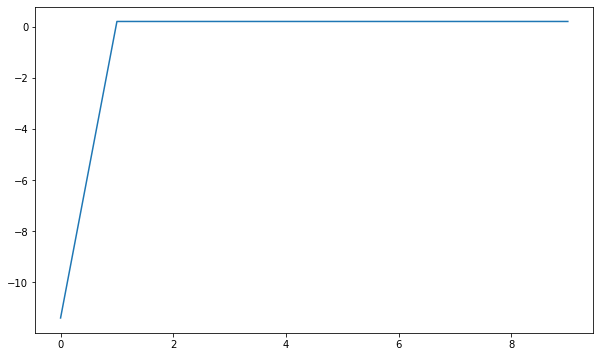

In [30]:
# 绘图
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(total_reward_list)